# TITANIC
Dummy Machine Learning project for a Dummy Data Cientist.  
It is part of my efforts to make my first submission to Kaggle Titanic Challenge.   

This notebook is meant to be a living document, where I can update with annotations as my experience grows in Data Science.

## Import Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

sns.set_style('whitegrid')

## 1) Load Datasets 'train' and 'test'

'train' dataset was ment to be used for training purposes only.  
'test' dataset was ment for using by trained model as aninput for the predictions.

In [15]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

td = pd.concat([train, test], ignore_index=True, sort=False)

In [16]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [17]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2) Missing values

Now we can visualize the columns that has Null values.

Text(0.5, 1.0, 'Missing Values Heatmap')

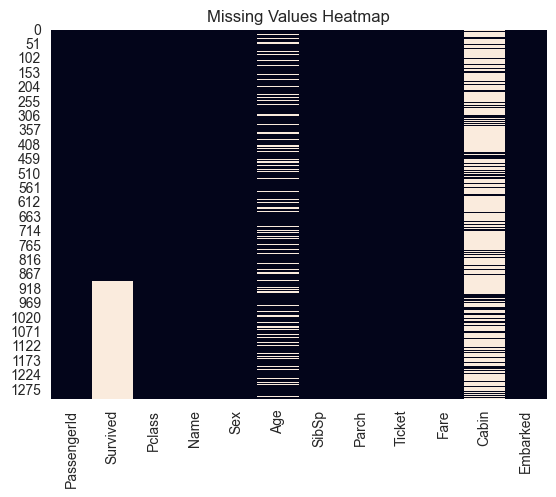

In [18]:
sns.heatmap(td.isnull(), cbar=False).set_title("Missing Values Heatmap")

Above we can see that there's a lot of nulls in 'Cabin', some nulls in 'Age' and full nulls in 'Survived' columns. The 'Survived' one has values only when the 'train' dataset was reached; when the 'test' begins, it start with null values because its dataset is only ment to be used in prediction, where 'Survived' is the goal to be achived.

## 3) Exploratory Analisys

Having a quick look at the data, we could see that 'Sex' has 2 possible values, and 'Embarked' & 'Pclass' has 3 possible values.   
We can start our classification looking at this values.

In [19]:
td.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

### 3.1) Survived

[Text(0, 0, '549'), Text(0, 0, '342')]

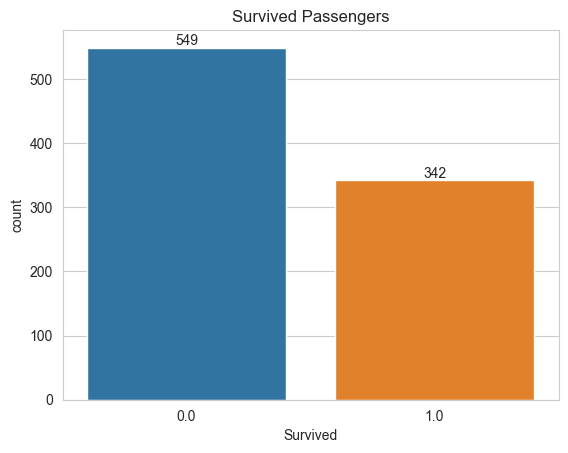

In [20]:
ax = sns.countplot(data=td, x = 'Survived')
ax.set(title='Survived Passengers')
ax.bar_label(ax.containers[0])

In [21]:
td[td['Survived'] == 1]['PassengerId'].count() / td[td['Survived'] == 0]['PassengerId'].count()

0.6229508196721312

More than **62%** of the passengers did not survive to the Titanic tragedy.

### 3.2) Pclass

This column renders the 'Passenger Class', i.e. the class given to the passenger to identify the amount of money paid on the ticket to Titanic and the benefits inside the ship (acomodations, allowed places, etc.)

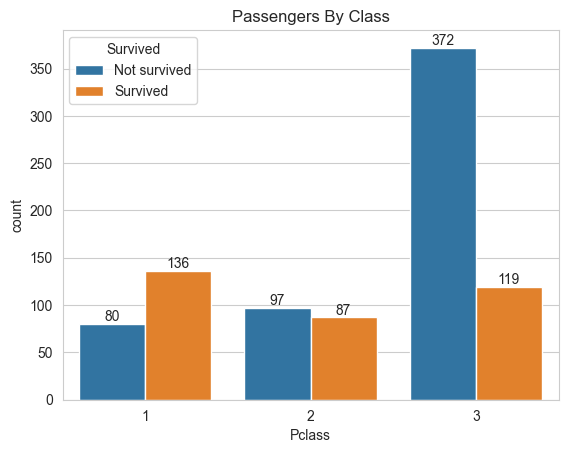

In [22]:
ax = sns.countplot(data=td, x='Pclass', hue='Survived')
ax.set(title='Passengers By Class')
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Not survived', 'Survived'], title='Survived')
for bars in ax.containers:
    ax.bar_label(bars)

Analysing above graphic, we can clearly see that the most of deaths was in class 3.

### 3.3) Sex

In [23]:
total_psg = td['PassengerId'].count()
total_dead = td[td['Survived'] == 0]['PassengerId'].count()
sex_counts = td['Sex'].value_counts()
sex_dcounts = td[td['Survived'] == 0]['Sex'].value_counts()
perc_male = (sex_counts['male'] / total_psg) * 100
perc_female = (sex_counts['female'] / total_psg) * 100
perc_dmale = (sex_dcounts['male'] / total_dead) * 100
perc_dfemale = (sex_dcounts['female'] / total_dead) * 100

print("Total Passengers: ", total_psg)
print(f"Male Passengers: {sex_counts['male']} ({perc_male:.2f}%)")
print(f"Female Passengers: {sex_counts['female']} ({perc_female:.2f}%)")
print(f"Dead Men: {sex_dcounts['male']} ({perc_dmale:.2f}%)")
print(f"Dead Women: {sex_dcounts['female']} ({perc_dfemale:.2f}%)")

Total Passengers:  1309
Male Passengers: 843 (64.40%)
Female Passengers: 466 (35.60%)
Dead Men: 468 (85.25%)
Dead Women: 81 (14.75%)


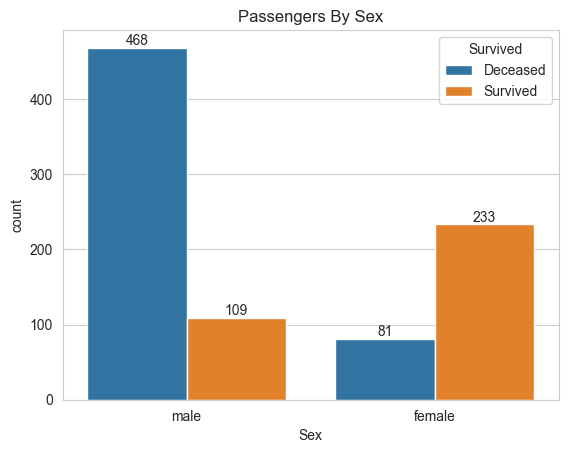

In [24]:
ax = sns.countplot(data=td, x='Sex', hue='Survived')
ax.set(title='Passengers By Sex')
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Deceased', 'Survived'], title='Survived')
for bars in ax.containers:
    ax.bar_label(bars)

As we can see, there was:
- _Total Passengers_:  1309
- _Male Passengers_: 843 (64.40% of total passsengers)
- _Female Passengers_: 466 (35.60% of total passsengers)
- _Dead Men_: 468 (85.25% from total deaths)
- _Dead Women_: 81 (14.75% from total deaths)

Although men were about 64% of total passengers, they were about 85% from total deaths.   
Women, otherwise, were about 35% of total passengers, but were about 14% of the total deaths.

This is true because, in all disasters, the first ones to be saved are women and children, followed by old men and, at last, men themselves.   
As there were not enough lifeboats on board, most of those who were saved were women and children.

### 3.4) Age

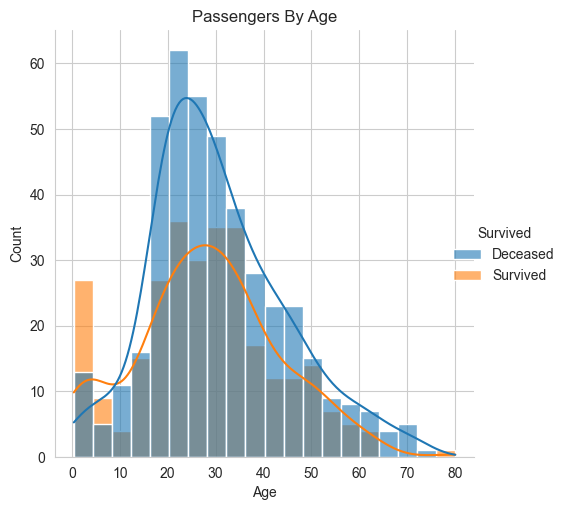

In [25]:
ax = sns.displot(td, x='Age', kde=True, hue='Survived', palette='tab10', alpha=0.6)
ax.set(title='Passengers By Age')
for t, l in zip(ax._legend.texts, ['Deceased', 'Survived']):
    t.set_text(l)

In [13]:
print(f"Minimum age on board: {td['Age'].min()}")
print(f"Maximum age on board: {td['Age'].max()}")
print(f"Mean age on board: {td['Age'].mean():.2f}")
print(f"Age null values: {td['Age'].isnull().sum()}")

Minimum age on board: 0.17
Maximum age on board: 80.0
Mean age on board: 29.88
Age null values: 263


Age values has a lot of null to be filled. By the way, it seem to be the most difficult information to fill in.   

We have to take in account what Title the passanger has (it is found in the 'Name') to get the mean value of that Title and then, apply to the respective 'Age' field.

In [26]:
def get_title(name):
    rx = re.compile(r'[^,]+, ?([^.]+)\. ?.+')
    return rx.search(name).group(1)

In [27]:
td['Title'] = td['Name'].map(get_title)


In [29]:
t = td.groupby('Title')[td.columns[5:6]].mean()

# I know that would be some better ways to achieve this goal, but be pacient! I'm a student too!
# You can always create a Pull Request to get this code better!
for index, row in td.iterrows():
    if np.isnan(row['Age']):
        td.at[index, 'Age'] = int(t.loc[row['Title']]['Age'])

In [37]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


### 3.5) SibSp and Parch

SibSP is the number of siblings or spouse of a person onboard.

Parch is the number of children or the parents that is travelling with a passenger.

To make the analysis more assertive, we can sum SibSp and Parch to the column 'FamilySize', i.e. by taking the number of Children, Parents, Siblings and the Spouse, plus one (the passenger itself), we can calculate the size of the family who did travel in Titanic.

In [36]:
td['FamilySize'] = td['SibSp'] + td['Parch'] + 1
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


### 3.6) Cabin

Cabin has a lot of missing data.

I decided to fill this with 'NA'.

In [39]:
td.Cabin = td.Cabin.fillna('NA')
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,Mr,1


### 3.7) Embarked

There where 3 ports that has embarked passengers: *Southampton, Cherburg* and *Queenstown*. The 'Embarked' Columns has 3 possibel values: 'S', 'C' and 'Q'.

In [40]:
td[td.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1


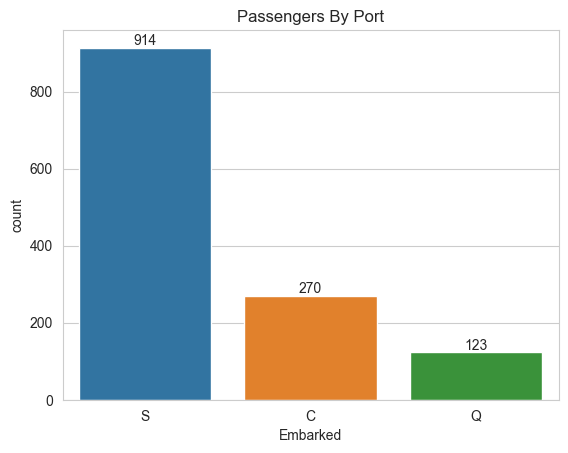

In [41]:
ax = sns.countplot(data=td, x='Embarked')
ax.set(title='Passengers By Port')
for bars in ax.containers:
    ax.bar_label(bars)

In [42]:
td.Embarked = td.Embarked.fillna('S')

There are 2 fields missing, and passengers seems to travel togheter, because they had the same ticket, payed the same fare and divided the same Cabin.

As the major part of passengers boarded in Southampton, I'll presume they boarded in that port.

## 4) Encoding

To prevent misinterpretation of the model, having at site the models doesn't handle well with strings, we'll have to deal with that transformating categorized data into binary data.

### 4.1) Sex

We'll change 'Sex' from 'male' and 'female' values into 0 and '1'.

In [44]:
td['Sex_binary'] = td.Sex.apply(lambda x: 0 if x == 'male' else 1 )
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Sex_binary
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,Mr,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,Mr,1,0


### 4.2) Title

We'll change 'Title' values using the 'get_dummies' function, adding 0 or 1 to a column named by the Title itself. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Don'),
  Text(5, 0, 'Rev'),
  Text(6, 0, 'Dr'),
  Text(7, 0, 'Mme'),
  Text(8, 0, 'Ms'),
  Text(9, 0, 'Major'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Sir'),
  Text(12, 0, 'Mlle'),
  Text(13, 0, 'Col'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'the Countess'),
  Text(16, 0, 'Jonkheer'),
  Text(17, 0, 'Dona')])

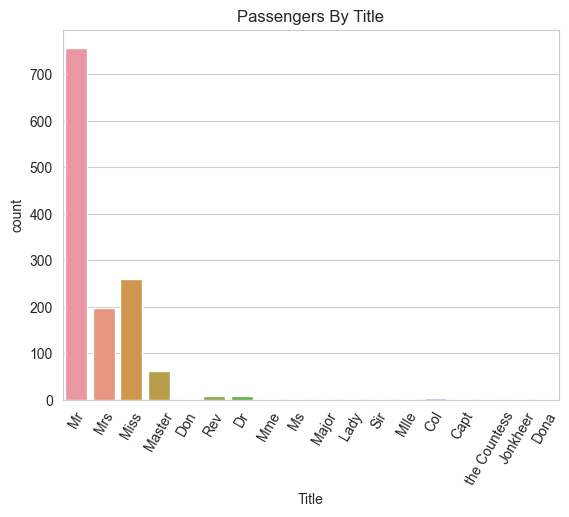

In [46]:
# Analysing the data in 'Title'
ax = sns.countplot(data=td, x='Title')
ax.set(title='Passengers By Title')
plt.xticks(rotation=60)

In [78]:
td[td.Title == 'Dr']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Sex_binary


First, we must group the Titles to a common factor:
- Don = Mr
- Rev = Mr
- Dr = if 'male' then goes to Mr; otherwise, goes to Miss (there is only one female Doctor, who travels alone).
- Mme = Miss
- Ms = Miss
- Major = Mr
- Lady = Mrs
- Sir = Mr
- Mlle = Miss
- Col = Mr
- Capt = Mr
- the Countess = Miss
- Jonkheer = Mr
- Dona = Miss

In [77]:
td.loc[td.Title.isin(['Don', 'Rev', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer']), 'Title'] = 'Mr'
td.loc[td.Title.isin(['Mme', 'Ms', 'Mlle', 'Dona', 'the Countess']), 'Title'] = 'Miss'
td.loc[td.Title == 'Lady', 'Title'] = 'Mrs'
td.loc[(td.Title == 'Dr') & (td.Sex == 'male'), 'Title'] = 'Mr'
td.loc[(td.Title == 'Dr') & (td.Sex == 'female'), 'Title'] = 'Miss'


[Text(0.5, 1.0, 'Passengers By Title')]

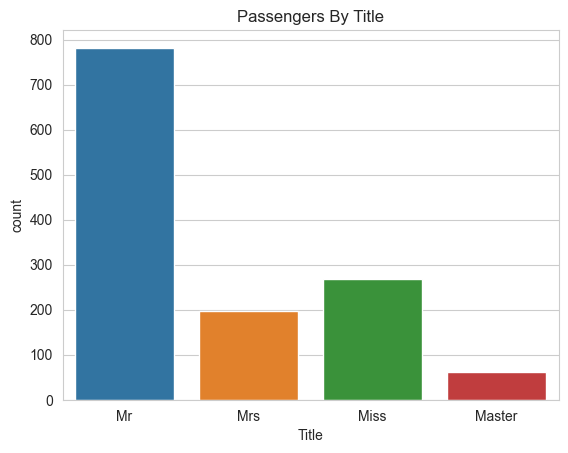

In [80]:
ax = sns.countplot(data=td, x='Title')
ax.set(title='Passengers By Title')

#pd.get_dummies(td['Title'], prefix='Title')

Now we can use the function get_dummies to make some binary columns.

In [86]:
title = pd.get_dummies(td['Title'], prefix='Title', drop_first=True)
td = pd.concat([td, title], axis = 1)
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Sex_binary,Title_Miss,Title_Mr,Title_Mrs
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,Mr,2,0,0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,Miss,1,1,1,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,Mr,1,0,0,1,0


### 4.3) Pclass

We can turn 'Pclass' into some dummy binary columns.

In [87]:
embarked = pd.get_dummies(td.Embarked, prefix='Emb', drop_first=True)
td = pd.concat([td, embarked], axis = 1)
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Sex_binary,Title_Miss,Title_Mr,Title_Mrs,Emb_Q,Emb_S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,Mr,2,0,0,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,Miss,1,1,1,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,0,1,0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,Mr,1,0,0,1,0,0,1


## Dropping Columns

Now we have encoded some columns into binary ones, we can get rid of them and those who has no need to exist.

In [90]:
td.drop(['Sex', 'Pclass', 'Fare', 'Cabin', 'Name', 'Title', 'Ticket', 'Embarked', 'SibSp', 'Parch'], axis=1, inplace=True)
td.head()

,PassengerId,Survived,Age,FamilySize,Sex_binary,Title_Miss,Title_Mr,Title_Mrs,Emb_Q,Emb_S
0,1,0.0,22.0,2,0,0,1,0,0,1
1,2,1.0,38.0,2,1,0,0,1,0,0
2,3,1.0,26.0,1,1,1,0,0,0,1
3,4,1.0,35.0,2,1,0,0,1,0,1
4,5,0.0,35.0,1,0,0,1,0,0,1


In [91]:
td.isnull().sum()

PassengerId      0
Survived       418
Age              0
FamilySize       0
Sex_binary       0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Emb_Q            0
Emb_S            0
dtype: int64

No missing data found, except the data from the test frame.

---

## 5) Prediction

Analysing the Titanic case, I believe this is a classification problem. Regarding a lot of conditionant variables, it must predict when a passenger is going to survive or not to the disaster.

There 2 algorithms that came to my mind:
- Random Forest
- Gaussian Naive Bayes

Let's get the numbers.

### 5.1) Data to be predicted

In [92]:
X_pred = td[td.Survived.isnull()]
X_pred = X_pred.drop(['Survived'], axis=1)

In [95]:
train_data = td
train_data = train_data.dropna()
feature_train = train_data['Survived']
label_train = train_data.drop(['Survived'], axis=1)

,PassengerId,Age,FamilySize,Sex_binary,Title_Miss,Title_Mr,Title_Mrs,Emb_Q,Emb_S
0,1,22.0,2,0,0,1,0,0,1
1,2,38.0,2,1,0,0,1,0,0
2,3,26.0,1,1,1,0,0,0,1
3,4,35.0,2,1,0,0,1,0,1
4,5,35.0,1,0,0,1,0,0,1


### 5.2) Gaussian Naive Bayes

NB Accuracy: 82.12%
The cross validated score for Gassian Naive Bayes is: 79.07


Text(0.5, 1.05, 'Confusion_matrix for NB')

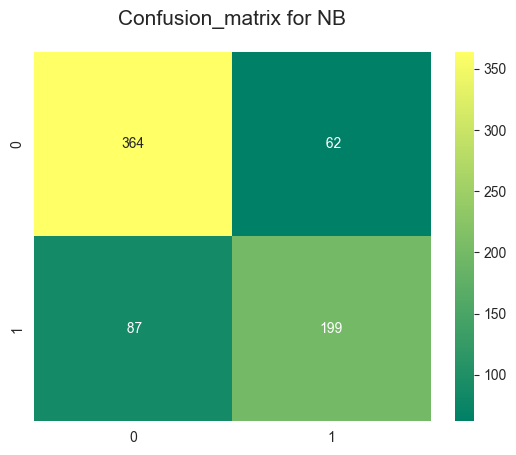

In [107]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix

clf = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(X_train, np.ravel(y_train))
print("NB Accuracy: " + repr(round(clf.score(X_test, y_test) * 100, 2)) + '%')

result_rf = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print('The cross validated score for Gassian Naive Bayes is:', round(result_rf.mean() * 100, 2))

y_pred = cross_val_predict(clf, X_train, y_train, cv=10)

sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='3.0f', cmap="summer")
plt.title('Confusion_matrix for NB', y=1.05, size=15)

### 5.3) Random Forest Classifier

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RF Accuracy: 81.56%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

The cross validated score for Random forest is: 81.89


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

Text(0.5, 1.05, 'Confusion_matrix for RF')

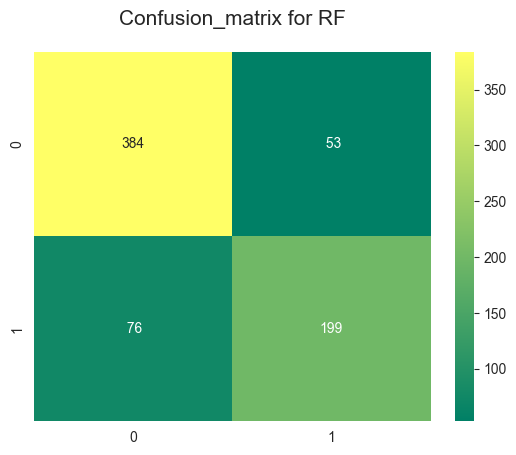

In [108]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")
result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

---

## 6) Predict

Last but not least, we can store the predicted results in a submission file.

In [109]:
result = clf.predict(X_pred)
submission = pd.DataFrame({'PassengerId': X_pred.PassengerId, 'Survived': result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)

filename = 'submission.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: submission.csv


### Generate Kaggle prediction file

In [138]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [103]:
sub.to_csv('fifth_submission.csv', header=True)

In [104]:
!head -n10 forth_subscribe.csv

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1
